In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
np.random.seed(44)

## Define a Fitness Function

In [2]:
rhc_run_stats = pd.read_pickle("./pickles/n_queen_rhc_run_stats.pkl")
rhc_run_curves = pd.read_pickle("./pickles/n_queen_rhc_run_curves.pkl")
sa_run_stats = pd.read_pickle("./pickles/n_queen_sa_run_stats.pkl")
sa_run_curves = pd.read_pickle("./pickles/n_queen_sa_run_curves.pkl")
ga_run_stats = pd.read_pickle("./pickles/n_queen_ga_run_stats.pkl")
ga_run_curves = pd.read_pickle("./pickles/n_queen_ga_run_curves.pkl")
mmc_run_stats = pd.read_pickle("./pickles/n_queen_mmc_run_stats.pkl")
mmc_run_curves = pd.read_pickle("./pickles/n_queen_mmc_run_curves.pkl")

In [7]:
# define alternative N-Queens fitness function for maximization prob.
def queeens_max(state):
    fitness_cnt = 0
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # check for attacking pairs
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j-i)) \
                and (state[j] != state[i] - (j-i)):
                
                # if noa attack
                fitness_cnt +=1

    return fitness_cnt

fitness_cust = mlrose_hiive.CustomFitness(queeens_max)

## Define an Optimization Problem Object
We use the fitness function as input into the optimization problem

__TSPOpt() descrive TSP optimization__

In [5]:
# there are 190 possible attacks (x2 actually)
possible_attack = 0
number_of_queens = 64 
for i in range(number_of_queens,0,-1):
    possible_attack += i
possible_attack

2080

### Random Hill Climb

In [9]:
%%time
# DiscreteOpt() takes integers in range 0 to max_val-1
problem = mlrose_hiive.DiscreteOpt(length = number_of_queens, fitness_fn = fitness_cust, 
                             maximize = True, max_val = number_of_queens)
runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[1955.0000]
	[20 35 49 45 59  3 32 20  3 47 42 56 23 55 22 25  3  7  3 35 38 45 53 36// 53 57  1 14 56 39 36 29 21 19 32 10 36 41 31 18  8 29 61  8 10 22 58 50// 16 51 52  8 51 50 18 28 29  1 63 12  2 11 45  2]...

restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[101], iteration:[509], done:[True], time:[4.71], fitness:[2002.0000]
	[20 35 49 46 59  3 32 15  3  8 40 56 23 30 17 25 54  7 34 11 38 45  4 36// 53 57  1 14 56 39 60 52 21 47 12 44 24 41 31 18 62 37 61 55 10 29 58 50// 16 51  5  8  6 13 18 28  0 42 63 33 60 26 43  2]...

restarts:[100], max_iters:[10000], current_restart:[1]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[4.73], fitness:[19

In [14]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

14.0

Text(0, 0.5, 'Value')

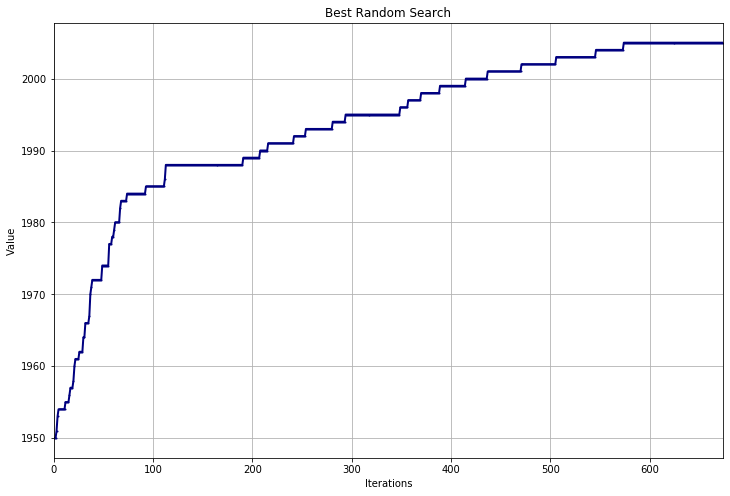

In [15]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [16]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

1999.4257425742574 2005.0
905.4187814289908


In [13]:
rhc_run_curves

,Iteration,Time,Fitness,Restarts,max_iters,current_restart
0,0,0.013070,1955.0,100,10000,0
1,1,0.024447,1955.0,100,10000,0
2,2,0.039318,1956.0,100,10000,0
3,3,0.066784,1959.0,100,10000,0
4,4,0.086149,1959.0,100,10000,0
...,...,...,...,...,...,...
55852,55852,902.838671,2004.0,100,10000,100
55853,55853,902.865114,2004.0,100,10000,100
55854,55854,902.889425,2004.0,100,10000,100
55855,55855,902.915887,2004.0,100,10000,100


## Simulated Annealing

In [20]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1955.0000]
	[20 35 49 45 59  3 32 20  3 47 42 56 23 55 22 25  3  7  3 35 38 45 53 36// 53 57  1 14 56 39 36 29 21 19 32 10 36 41 31 18  8 29 61  8 10 22 58 50// 16 51 52  8 51 50 18 28 29  1 63 12  2 11 45  2]...

schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[101], iteration:[2239], done:[True], time:[7.06], fitness:[2010.0000]
	[23 61 16  7 26 60 39 18 49 45 54 17 15 37 35 25 54  9 13 10 40  1 41 20// 53 42 52 14 56  3 28 62 59 48 19 36 43  0 31 12  4 46  8 47 32 29 58 49// 61 57  5 22 30  6  2 11 33 38 34 55 59 44 51 63]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[False], 

In [18]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

2010.2777777777778 2013.0
11.829856521110438


In [136]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

GeomDecay(init_temp=2500, decay=0.99, min_temp=0.001)

In [20]:
print(last_iters.loc[last_iters.schedule_init_temp == 1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 10, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 50, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 100, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 250, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 500, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 1000, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 2500, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 5000, "Time"].mean())

print(last_iters.loc[:, "Time"].mean())


7.380497051995917
8.200994589500624
13.679416435497842
12.355893705000199
11.426320211499842
12.68882520400075
11.828301113499037
15.193556087000616
13.714904291999119
11.829856521110438


Text(0, 0.5, 'Value')

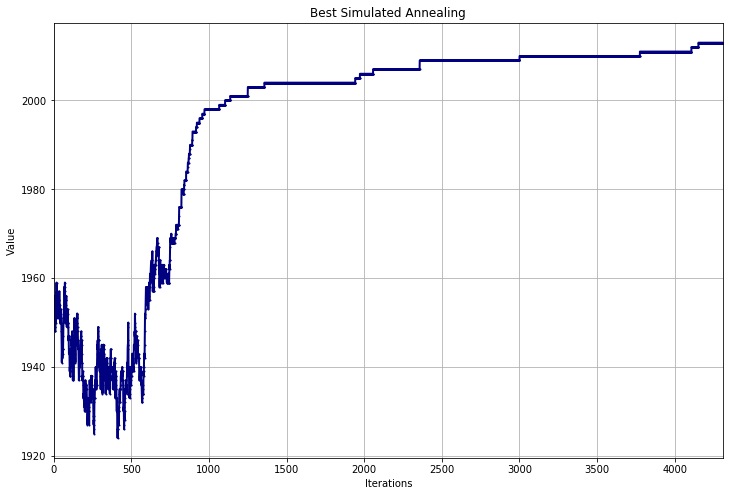

In [120]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

## Genetic Alg

In [21]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[50, 200, 500],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.15], fitness:[1955.0000]
	[20 35 49 45 59  3 32 20  3 47 42 56 23 55 22 25  3  7  3 35 38 45 53 36// 53 57  1 14 56 39 36 29 21 19 32 10 36 41 31 18  8 29 61  8 10 22 58 50// 16 51 52  8 51 50 18 28 29  1 63 12  2 11 45  2]...

pop_size:[50], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[101], iteration:[301], done:[True], time:[43.79], fitness:[2002.0000]
	[18 20 50 13  6 44 39 61 52 21 33 54 26  7 59 41 56  0 19 22 31 42 60  3// 16 30  1 47 55 10 37 17 60  2  0  8 53  9 62 48 35 56  5 27 14 49 34 46//  9 36 43 28 52 61 44 29 59 55 11 27 57 40 14 25]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.25], max_iters:[100000]
runner_name:[ga], e

In [23]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
2012.0 2006.888888888889 259.42285825833176
Mutation Rate
0.10    2006.666667
0.25    2007.000000
0.50    2007.000000
Name: Fitness, dtype: float64
Population Size
50     2002.000000
200    2008.333333
500    2010.333333
Name: Fitness, dtype: float64
Population Size
50      49.350818
200    192.022607
500    536.895150
Name: Time, dtype: float64


## MIMIC

In [23]:
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                  experiment_name="MMC_Exp",
                  seed=44,
                  iteration_list=[100000],
                  max_attempts=100,
                  population_sizes=[50, 200, 500],
                  keep_percent_list=[0.25, 0.5, 0.75],
                  use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[50], keep_pct:[0.25], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[0], iteration:[0], done:[False], time:[0.16], fitness:[1955.0000]
	[20 35 49 45 59  3 32 20  3 47 42 56 23 55 22 25  3  7  3 35 38 45 53 36// 53 57  1 14 56 39 36 29 21 19 32 10 36 41 31 18  8 29 61  8 10 22 58 50// 16 51 52  8 51 50 18 28 29  1 63 12  2 11 45  2]...

use_fast_mimic:[True], pop_size:[50], keep_pct:[0.25], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[101], iteration:[101], done:[True], time:[241.27], fitness:[1960.0000]
	[35. 57.  3. 13.  6.  1. 39. 26. 52. 29. 41. 62. 41. 15. 43. 46. 25.  4.// 61.  8. 63. 55. 37.  1. 16. 63. 56. 47. 41. 54. 39. 48. 59. 63.  0. 47.// 20. 34. 62. 11. 28. 61. 32.  5. 14. 27. 34. 61. 61....

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True],

In [22]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
1989.0 1972.5555555555557 1057.3194779058872
Keep Percent
0.25    1969.666667
0.50    1976.333333
0.75    1971.666667
Name: Fitness, dtype: float64
Population Size
50     1958.333333
200    1974.000000
500    1985.333333
Name: Fitness, dtype: float64
Population Size
50      247.235210
200     808.123394
500    2116.599829
Name: Time, dtype: float64


In [159]:
rhc_run_stats.to_pickle("./n_queen_rhc_run_stats.pkl")
rhc_run_curves.to_pickle("./n_queen_rhc_run_curves.pkl")
sa_run_stats.to_pickle("./n_queen_sa_run_stats.pkl")
sa_run_curves.to_pickle("./n_queen_sa_run_curves.pkl")
ga_run_stats.to_pickle("./n_queen_ga_run_stats.pkl")
ga_run_curves.to_pickle("./n_queen_ga_run_curves.pkl")
mmc_run_stats.to_pickle("./n_queen_mmc_run_stats.pkl")
mmc_run_curves.to_pickle("./n_queen_mmc_run_curves.pkl")


In [160]:
df = pd.read_pickle("./n_queen_rhc_run_stats.pkl")

In [161]:
df

,Iteration,Fitness,Time,State,Restarts,max_iters,current_restart
0,0,1955.0,0.004144,"[20, 35, 49, 45, 59, 3, 32, 20, 3, 47, 42, 56,...",100,10000,0
1,10000,2002.0,1.708502,"[20, 35, 49, 46, 59, 3, 32, 15, 3, 8, 40, 56, ...",100,10000,0
2,0,1928.0,1.715401,"[23, 30, 7, 31, 37, 19, 31, 50, 33, 49, 31, 18...",100,10000,1
3,10000,2001.0,3.697100,"[23, 11, 7, 41, 17, 53, 31, 50, 30, 51, 5, 61,...",100,10000,1
4,0,1932.0,3.705169,"[49, 24, 11, 34, 41, 19, 10, 24, 52, 59, 3, 56...",100,10000,2
...,...,...,...,...,...,...,...
197,10000,2003.0,326.638823,"[8, 17, 7, 53, 49, 35, 45, 10, 23, 57, 51, 32,...",100,10000,98
198,0,1943.0,326.712766,"[17, 18, 3, 42, 8, 1, 50, 4, 52, 23, 15, 5, 26...",100,10000,99
199,10000,1996.0,331.507353,"[60, 18, 55, 42, 8, 38, 35, 25, 52, 0, 15, 3, ...",100,10000,99
200,0,1942.0,331.591660,"[33, 28, 18, 43, 58, 27, 52, 37, 27, 59, 3, 16...",100,10000,100
